# Proactive Fraud Detection

#### Data Description

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np

#### Since the Dataset is large, i have a created a chunksize dataset of 1000000 using a sample fraction of 10% from the dataset

In [2]:
chunk_size = 1000000
chunks = pd.read_csv('Fraud.csv',chunksize=chunk_size)

In [3]:
sample = []
sample_fraction = 0.10
for chunk in chunks:
    sample_chunk = chunk.sample(frac=sample_fraction,random_state=42)
    sample.append(sample_chunk)

In [4]:
df = pd.concat(sample,ignore_index=True)

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,45,PAYMENT,79.86,C1048495139,21400.00,21320.14,M1649887119,0.00,0.00,0,0
1,10,CASH_IN,285423.14,C1223059230,510.00,285933.14,C708232604,561.00,0.00,0,0
2,23,CASH_IN,176371.13,C2047243429,2227768.61,2404139.74,C1614837211,2471996.98,2295625.85,0,0
3,20,CASH_OUT,283759.53,C813860567,6231.00,0.00,C603023442,1397807.89,1681567.41,0,0
4,9,CASH_OUT,262268.28,C204225557,104675.00,0.00,C426784026,76376.58,1674917.08,0,0
...,...,...,...,...,...,...,...,...,...,...,...
636257,551,PAYMENT,3168.76,C666479625,22671.00,19502.24,M1496266101,0.00,0.00,0,0
636258,640,CASH_IN,161492.93,C953037310,525.00,162017.93,C983685002,146814.83,0.00,0,0
636259,587,PAYMENT,10.33,C2094043856,0.00,0.00,M4005339,0.00,0.00,0,0
636260,589,CASH_OUT,6857.79,C488845550,0.00,0.00,C751944914,1021946.91,1028804.70,0,0


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,45,PAYMENT,79.86,C1048495139,21400.00,21320.14,M1649887119,0.00,0.00,0,0
1,10,CASH_IN,285423.14,C1223059230,510.00,285933.14,C708232604,561.00,0.00,0,0
2,23,CASH_IN,176371.13,C2047243429,2227768.61,2404139.74,C1614837211,2471996.98,2295625.85,0,0
3,20,CASH_OUT,283759.53,C813860567,6231.00,0.00,C603023442,1397807.89,1681567.41,0,0
4,9,CASH_OUT,262268.28,C204225557,104675.00,0.00,C426784026,76376.58,1674917.08,0,0


#### Lets check the Null Values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


#### Descriptive Statistics

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,243.356806,1.817420e+05,8.350091e+05,8.563416e+05,1.100034e+06,1.225510e+06,0.001309,0.000002
std,142.325680,6.233388e+05,2.883958e+06,2.920100e+06,3.399043e+06,3.682477e+06,0.036159,0.001254
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.338586e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.520948e+04,1.437355e+04,0.000000e+00,1.337890e+05,2.166279e+05,0.000000,0.000000
75%,334.000000,2.089378e+05,1.077535e+05,1.451864e+05,9.443898e+05,1.114494e+06,0.000000,0.000000
max,743.000000,6.384799e+07,5.731626e+07,4.731626e+07,3.560159e+08,3.561793e+08,1.000000,1.000000


In [10]:
df.shape

(636262, 11)

In [11]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    636261
1         1
Name: count, dtype: int64

In [12]:
df['isFraud'].value_counts()

isFraud
0    635429
1       833
Name: count, dtype: int64

In [13]:
df['type'].value_counts()

type
CASH_OUT    223956
PAYMENT     214824
CASH_IN     140080
TRANSFER     53250
DEBIT         4152
Name: count, dtype: int64

#### Lets Visualize the variables.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='type', ylabel='amount'>

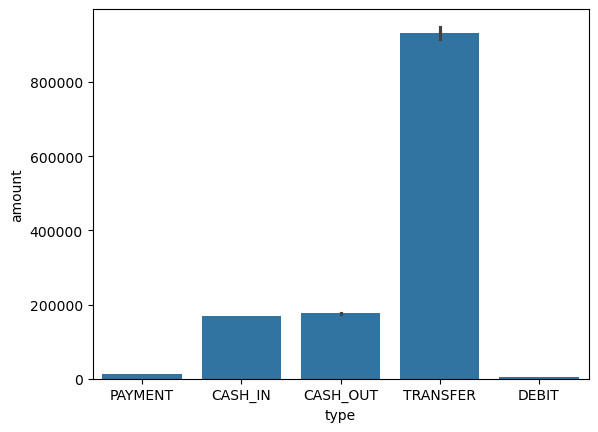

In [47]:
sns.barplot(x = df['type'],y=df['amount'],data=df)

Transfer type of Amount Transaction Is mostly used

<Axes: xlabel='amount'>

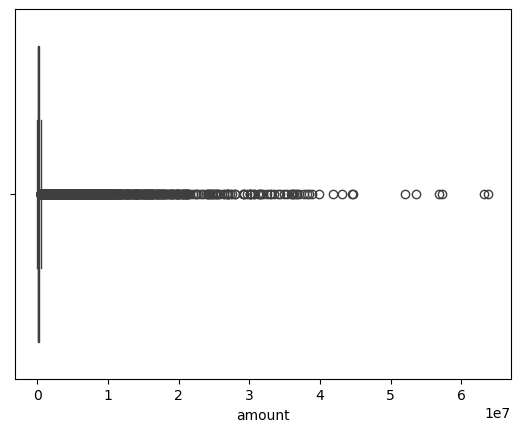

In [48]:
sns.boxplot(x = df['amount'],data=df)

C:\Users\RITHIKA\AppData\Local\Temp\ipykernel_16536\2318427200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'])


<Axes: xlabel='step', ylabel='Density'>

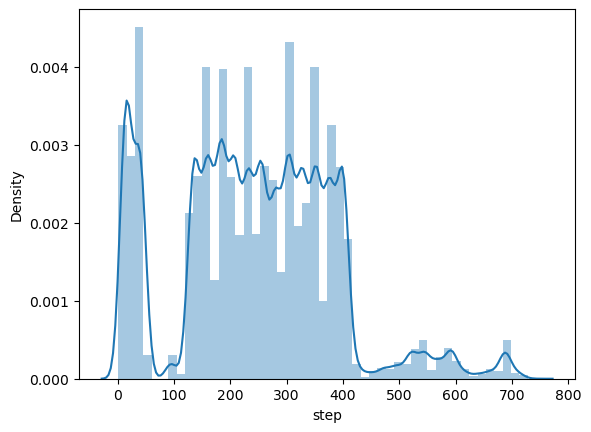

In [52]:
sns.distplot(df['step'])

#### One Hot Encoding
- Since the Type have the categories values , its best to use the one hot encoding to have a class values for the types

In [15]:
features_ohe = pd.get_dummies(df['type'], drop_first = True)
features_ohe = features_ohe.astype('int')
features_ohe

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
636257,0,0,1,0
636258,0,0,0,0
636259,0,0,1,0
636260,1,0,0,0


In [16]:
df_new = pd.concat([df, features_ohe], axis=1)
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,45,PAYMENT,79.86,C1048495139,21400.00,21320.14,M1649887119,0.00,0.00,0,0,0,0,1,0
1,10,CASH_IN,285423.14,C1223059230,510.00,285933.14,C708232604,561.00,0.00,0,0,0,0,0,0
2,23,CASH_IN,176371.13,C2047243429,2227768.61,2404139.74,C1614837211,2471996.98,2295625.85,0,0,0,0,0,0
3,20,CASH_OUT,283759.53,C813860567,6231.00,0.00,C603023442,1397807.89,1681567.41,0,0,1,0,0,0
4,9,CASH_OUT,262268.28,C204225557,104675.00,0.00,C426784026,76376.58,1674917.08,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,551,PAYMENT,3168.76,C666479625,22671.00,19502.24,M1496266101,0.00,0.00,0,0,0,0,1,0
636258,640,CASH_IN,161492.93,C953037310,525.00,162017.93,C983685002,146814.83,0.00,0,0,0,0,0,0
636259,587,PAYMENT,10.33,C2094043856,0.00,0.00,M4005339,0.00,0.00,0,0,0,0,1,0
636260,589,CASH_OUT,6857.79,C488845550,0.00,0.00,C751944914,1021946.91,1028804.70,0,0,1,0,0,0


In [17]:
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,45,PAYMENT,79.86,C1048495139,21400.00,21320.14,M1649887119,0.00,0.00,0,0,0,0,1,0
1,10,CASH_IN,285423.14,C1223059230,510.00,285933.14,C708232604,561.00,0.00,0,0,0,0,0,0
2,23,CASH_IN,176371.13,C2047243429,2227768.61,2404139.74,C1614837211,2471996.98,2295625.85,0,0,0,0,0,0
3,20,CASH_OUT,283759.53,C813860567,6231.00,0.00,C603023442,1397807.89,1681567.41,0,0,1,0,0,0
4,9,CASH_OUT,262268.28,C204225557,104675.00,0.00,C426784026,76376.58,1674917.08,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,551,PAYMENT,3168.76,C666479625,22671.00,19502.24,M1496266101,0.00,0.00,0,0,0,0,1,0
636258,640,CASH_IN,161492.93,C953037310,525.00,162017.93,C983685002,146814.83,0.00,0,0,0,0,0,0
636259,587,PAYMENT,10.33,C2094043856,0.00,0.00,M4005339,0.00,0.00,0,0,0,0,1,0
636260,589,CASH_OUT,6857.79,C488845550,0.00,0.00,C751944914,1021946.91,1028804.70,0,0,1,0,0,0


#### Lets Remove the features which we wont be using for the model building

In [18]:
df_new.drop(['type','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

#### I have cleaned and prepared a new Dataset for the model building

#### correlation Analysis

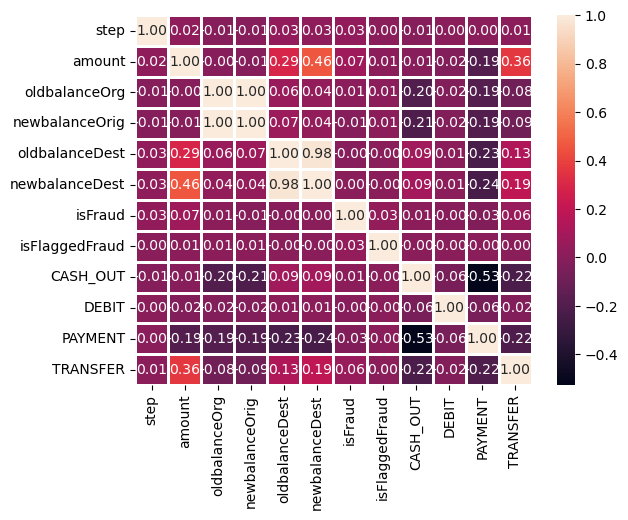

In [57]:
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   amount          636262 non-null  float64
 2   oldbalanceOrg   636262 non-null  float64
 3   newbalanceOrig  636262 non-null  float64
 4   oldbalanceDest  636262 non-null  float64
 5   newbalanceDest  636262 non-null  float64
 6   isFraud         636262 non-null  int64  
 7   CASH_OUT        636262 non-null  int32  
 8   DEBIT           636262 non-null  int32  
 9   PAYMENT         636262 non-null  int32  
 10  TRANSFER        636262 non-null  int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 43.7 MB


Split the dataset in two variables for train test split

In [20]:
x = df_new.drop(['isFraud'],axis=1)
y = df_new['isFraud']

In [21]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,45,79.86,21400.00,21320.14,0.00,0.00,0,0,1,0
1,10,285423.14,510.00,285933.14,561.00,0.00,0,0,0,0
2,23,176371.13,2227768.61,2404139.74,2471996.98,2295625.85,0,0,0,0
3,20,283759.53,6231.00,0.00,1397807.89,1681567.41,1,0,0,0
4,9,262268.28,104675.00,0.00,76376.58,1674917.08,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
636257,551,3168.76,22671.00,19502.24,0.00,0.00,0,0,1,0
636258,640,161492.93,525.00,162017.93,146814.83,0.00,0,0,0,0
636259,587,10.33,0.00,0.00,0.00,0.00,0,0,1,0
636260,589,6857.79,0.00,0.00,1021946.91,1028804.70,1,0,0,0


In [22]:
y

0         0
1         0
2         0
3         0
4         0
         ..
636257    0
636258    0
636259    0
636260    0
636261    0
Name: isFraud, Length: 636262, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((509009, 10), (509009,), (127253, 10), (127253,))

##### Since the Dataset is highly imbalanced, Random Over Sampler will balanced the classifing variable so there will not be any bias in the classification

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
x_train, y_train = ros.fit_resample(x_train,y_train)
x_train.shape,y_train.shape

((1016668, 10), (1016668,))

In [28]:
x_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,322,2982143.01,101638.00,0.00,6561392.07,9543535.09,0,0,0,1
1,158,277876.95,637.00,278513.95,144245.40,0.00,0,0,0,0
2,378,107109.55,0.00,0.00,4241448.51,4348558.06,1,0,0,0
3,352,159445.97,0.00,0.00,2014719.58,2174165.55,1,0,0,0
4,595,44961.40,21092.00,0.00,3553397.73,3598359.13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1016663,68,915266.65,915266.65,0.00,2415414.35,3330681.00,1,0,0,0
1016664,196,436035.29,436035.29,0.00,0.00,0.00,0,0,0,1
1016665,639,49199.20,49199.20,0.00,0.00,0.00,0,0,0,1
1016666,512,718350.64,718350.64,0.00,0.00,718350.64,1,0,0,0


In [29]:
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1016663    1
1016664    1
1016665    1
1016666    1
1016667    1
Name: isFraud, Length: 1016668, dtype: int64

The model will not perform good if the scale of the features are not in the same scale!

#### The StandardScaler in Python's scikit-learn library is used to standardize features by removing the mean and scaling to unit variance. This is often done as a preprocessing step in machine learning models to ensure that all features contribute equally to the model's learning process, especially when different features have different scales.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to train set

# Transform the train and test set
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_predict = lr.predict(x_test)

In [34]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Logistic Regression:",accuracy_score(y_test,y_predict))

Logistic Regression: 0.9543900733185072


#### Random Forest 
- Handle outliers naturally because they use decision trees, which are not as sensitive to extreme values and can handle large data's too.

In [37]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_predict1 = rfc.predict(x_test)

In [39]:
print("Random Forest Classifier:",accuracy_score(y_test,y_predict1))

Random Forest Classifier: 0.9996778072029736


#### XGBoost Classifier

In [40]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_predict2 = xgb.predict(x_test)

In [42]:
print("XGBooster Classifier:",accuracy_score(y_test,y_predict2))

XGBooster Classifier: 0.9993713311277533


In [43]:
import warnings
warnings.filterwarnings('ignore')

#### model Evaluation - StratifiedKFold,cross_val_score

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(lr, x, y, cv=skf)

print("Stratified cross-validation scores:", scores)

Stratified cross-validation scores: [0.97310083 0.99923774 0.99921416 0.99897841 0.99894697]


In [63]:
cross_scores = cross_val_score(lr, x, y, cv=10)

print("Cross-validation scores:", cross_scores)
print("Average score:", cross_scores.mean())

Cross-validation scores: [0.98880978 0.99454634 0.99930846 0.99919844 0.99918272 0.99915129
 0.99910414 0.99905699 0.99894697 0.99897841]
Average score: 0.9976283542009202


In [46]:
from sklearn.metrics import confusion_matrix

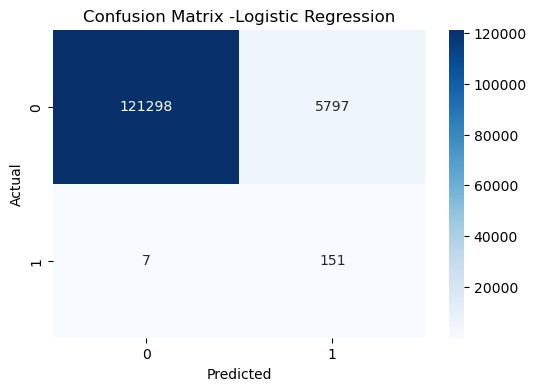

In [47]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix -Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

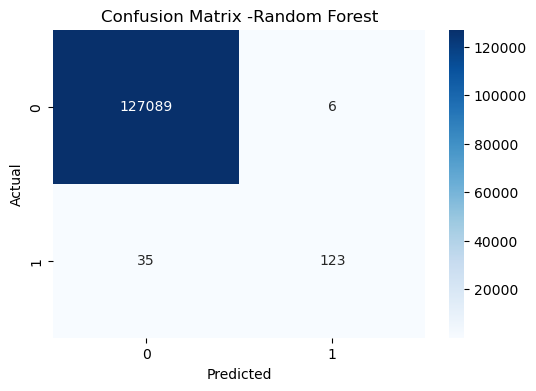

In [48]:
cm = confusion_matrix(y_test, y_predict1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix -Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

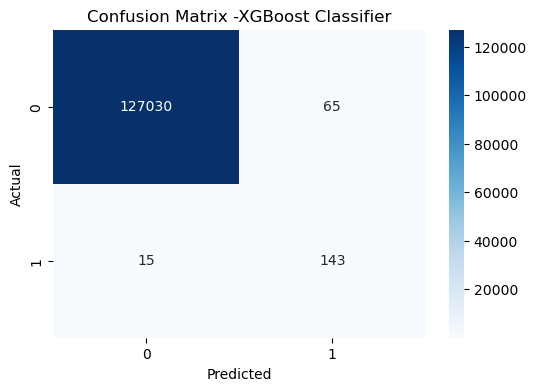

In [49]:
cm = confusion_matrix(y_test, y_predict2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix -XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Precision and Recall

In [50]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.03
Recall: 0.96


In [51]:
precision = precision_score(y_test, y_predict1)
recall = recall_score(y_test, y_predict1)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.95
Recall: 0.78


In [52]:
precision = precision_score(y_test, y_predict2)
recall = recall_score(y_test, y_predict2)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.69
Recall: 0.91


#### Random forest and XGBoost classifer performs better in the model evaluations - confusion Matrix, Precision and recall 

In [53]:
importance = rfc.feature_importances_

In [54]:
feature_importance = pd.DataFrame({
    'Feature':x.columns,
    'Importance': importance
})
feature_importance

,Feature,Importance
0,step,0.079954
1,amount,0.157375
2,oldbalanceOrg,0.289044
3,newbalanceOrig,0.154685
4,oldbalanceDest,0.049936
5,newbalanceDest,0.061432
6,CASH_OUT,0.065174
7,DEBIT,0.000073
8,PAYMENT,0.046776
9,TRANSFER,0.095550


In [55]:
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

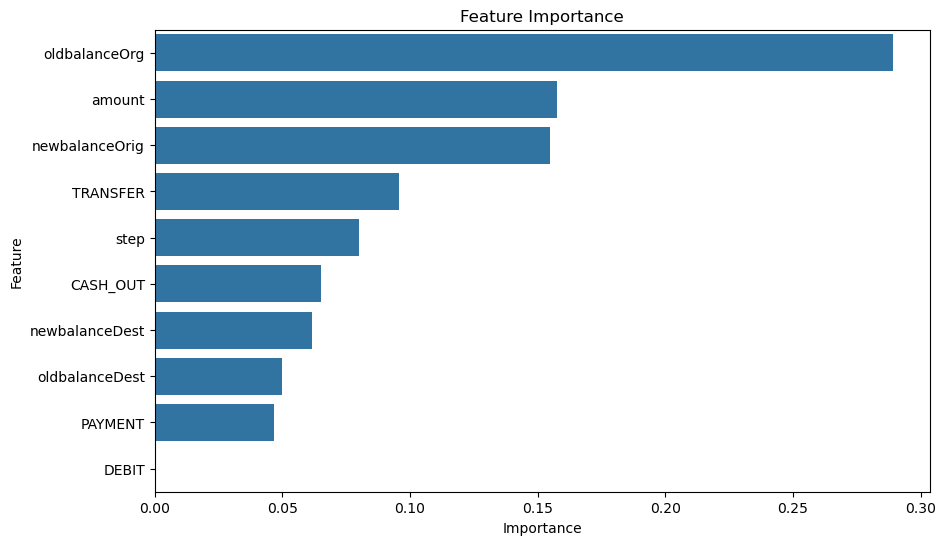

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

1) oldbalanceOrg (0.304084): This feature represents the original balance before the transaction occurred. Its high importance suggests that the amount of balance a customer has before the transaction is a significant predictor of fraud. A large discrepancy between the old balance and the new balance could indicate suspicious activity.

2) newbalanceOrig (0.180019): This feature represents the balance after the transaction. Its importance suggests that changes in balance after a transaction are also crucial in identifying fraud.

3) amount (0.134481): This feature represents the transaction amount. Large transaction amounts can be indicative of fraudulent activities, especially if they are out of the ordinary for the account.

4) step (0.070695): This feature likely represents the time or sequence of the transaction. While less important compared to balance and amount, it still provides contextual information that could be relevant for detecting anomalies.

5) PAYMENT (0.069274) and TRANSFER (0.083311): These features represent transaction types. Their importance indicates that the type of transaction can be a factor in detecting fraud. Certain types of transactions might be more frequently associated with fraud.

6) oldbalanceDest (0.054761) and newbalanceDest (0.064527): These features represent the balance of the destination account before and after the transaction. Their lower importance compared to the originating account balances suggests they are less critical but still relevant.

7) CASH_OUT (0.038658) and DEBIT (0.000191): These features represent different transaction categories. Their lower importance indicates they have a smaller role in detecting fraud compared to balance and amount.

#### Do These Factors Make Sense?
Yes, the factors generally make sense:

1) Balances (oldbalanceOrg and newbalanceOrig): These are crucial for fraud detection because they provide insights into how transactions impact account balances, which can highlight unusual patterns or discrepancies.
2) Amount: This is a key indicator of fraud since large or unexpected amounts often signal fraudulent activity.
3) Transaction Type: Different types of transactions may be associated with higher risks of fraud, which aligns with the observed feature importance.

#### What Kind of Prevention Should Be Adopted When Updating Infrastructure?
When updating the company's infrastructure, the focus should be on both technical and organizational measures. Key prevention strategies include:

##### Technical Measures:
- Anomaly Detection Systems: Integrate advanced machine learning models to monitor and flag abnormal patterns in real-time. This should be dynamic and adjust thresholds based on real-time patterns.

- Multi-Factor Authentication (MFA): Strengthen customer account security by requiring multiple forms of verification (e.g., passwords, SMS-based codes, biometrics).

- Encryption & Tokenization: Ensure all sensitive customer data is encrypted and consider using tokenization to protect transaction data from being intercepted.

- Device Fingerprinting: Monitor and flag unusual device behavior. A trusted list of devices should be maintained for each account.

- Rate Limiting & Throttling: Limit the number of transactions a user can make in a certain period to prevent rapid-fire fraudulent actions.

- Behavioral Analytics: Track user behavior (e.g., typing speed, mouse movement) to differentiate legitimate users from fraudsters using automated scripts or bots.

##### Organizational Measures:
- Fraud Training for Employees: Ensure employees are well-trained to spot fraud signals, especially in customer service and IT support teams.

- Customer Awareness Campaigns: Educate customers about safe online practices and common fraud tactics. Encouraging strong passwords and safe browsing can reduce risk.

- Collaboration with Law Enforcement: Work with local or international authorities to track and prosecute major fraud attempts.



#### To assess the effectiveness of the implemented prevention strategies, should use both quantitative metrics and qualitative feedback.

- Quantitative Metrics:
Reduction in Fraud Incidents: Track the number of detected fraud cases over time. A decreasing trend suggests successful prevention.

- Prevention Effectiveness Rate:
Effectiveness Rate = (Number of Prevented Fraud Cases / Total Fraud Attempts) × 100

- False Positive and False Negative Rates: Monitor the model’s precision and recall on post-implementation data to ensure that legitimate transactions aren’t being falsely flagged, and fraudulent ones aren’t missed.

- Customer Complaints: Monitor complaints related to fraud or inconvenience from excessive false positives. A reduction in complaints can signal better fraud detection and prevention measures.

- Cost Savings: Measure the reduction in financial losses from fraud. Compare pre- and post-implementation periods to evaluate the financial impact of the fraud prevention strategies.

- Qualitative Feedback:
Customer Feedback: Gather feedback from customers about the usability and impact of the new security measures (e.g., are MFA systems too cumbersome?).

- Employee Feedback: Internal teams handling fraud detection should report how easy it is to work with the new systems and whether they are seeing improvements.